<a href="https://colab.research.google.com/github/Sliders122/DSTI_ANN/blob/main/fashion_mnist_classification_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Fashion MNIST Classification from TensorFlow Docs
## A look at neural network: basic classification using tf.keras

This notebook trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details, this is a fast-paced overview of a complete TensorFlow program with the details explained as we go.

This notebook uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [ ]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(tf.__version__)

2.8.2


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code. 

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
X_train.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(y_train)

60000

Each label is an integer between 0 and 9:

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
X_test.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(y_test)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

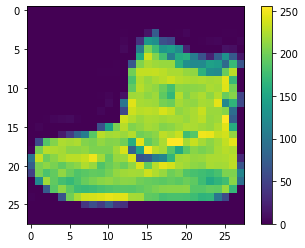

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [ ]:
X_train = X_train / 255.0

X_test = X_test / 255.0

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

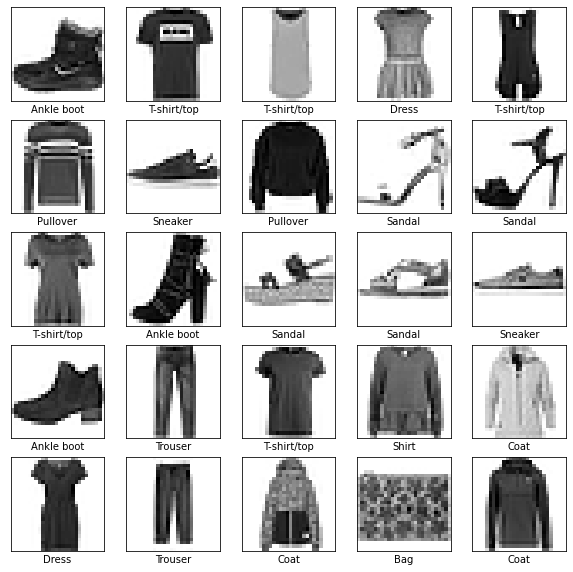

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

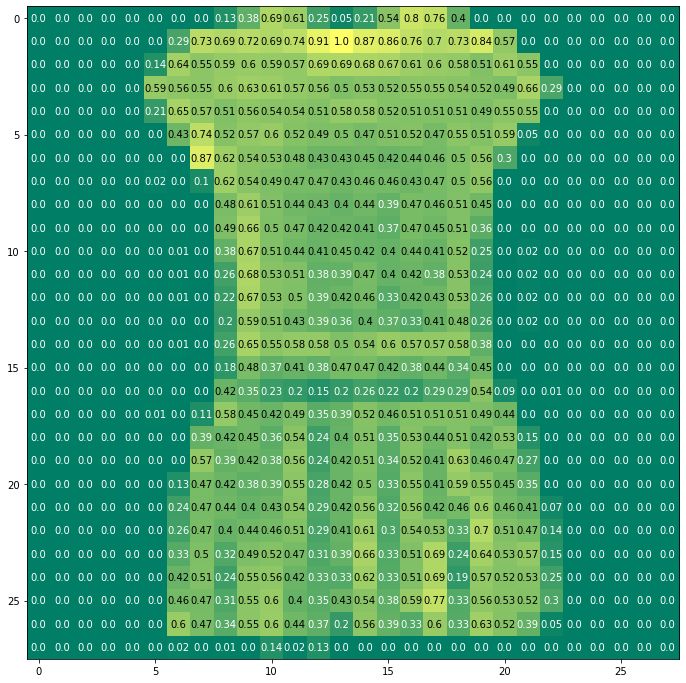

In [ ]:
#Visualizing for Fashion MNIST
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[3], ax)
plt.show()

### Encoding the labels

Now, let's encode the label classes in the dataset with the help of to_categorical() function from Keras utils library. 

In [ ]:
#y_train[0]

In [ ]:
#from tensorflow.keras.utils import to_categorical

#Encoding Fashion MNIST Labels
#y_train = to_categorical(y_train, num_classes=10)

#y_test = to_categorical(y_test, num_classes=10)

In [ ]:
#y_train[0]

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # link : https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


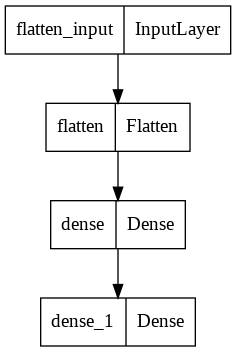

In [ ]:
#Plotting the schema of neural network
keras.utils.plot_model(model)

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely-connected, or fully-connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [ ]:
model.fit(X_train, y_train, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.5445 - accuracy: 0.8120
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.4047 - accuracy: 0.8565
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3641 - accuracy: 0.8707
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3344 - accuracy: 0.8789
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3142 - accuracy: 0.8867
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3020 - accuracy: 0.8913
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2870 - accuracy: 0.8953
Epoch 8/30
600/600 [==============================] - 2s 4ms/step - loss: 0.2750 - accuracy: 0.8991
Epoch 9/30
600/600 [==============================] - 3s 5ms/step - loss: 0.2650 - accuracy: 0.9027
Epoch 10/30
600/600 [==============================] - 5s 8ms/step - loss: 0.2587 - accuracy: 0.9048

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.95 (or 95%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.8911
Test accuracy: 0.8910999894142151


In [ ]:
#Printing the test accuracy results
print('Fashion MNIST Test accuracy:', round(test_acc,4))

Fashion MNIST Test accuracy: 0.8911


From the results, we can see that the MNIST data yielded (90%) on test data. 

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(predictions.shape)

(10000, 10)


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([2.3536286e-12, 3.0867205e-11, 1.6973199e-11, 4.1670724e-14,
       4.4379457e-12, 1.0705759e-04, 2.0059841e-10, 2.1184288e-04,
       6.3200088e-12, 9.9968112e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or `class_names[9]`. And we can check the test label to see this is correct:

In [ ]:
y_test[0]

9

We can graph this to look at the full set of 10 channels

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. 

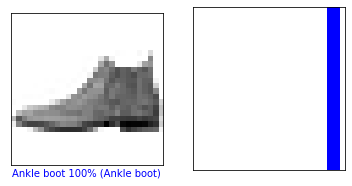

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

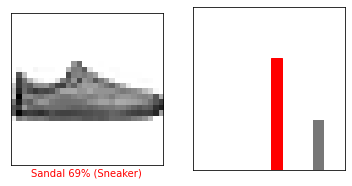

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident. 

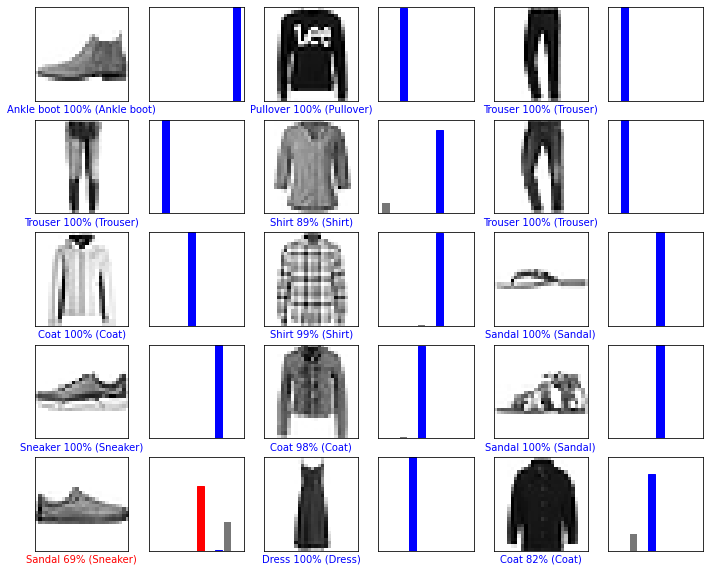

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

Finally, use the trained model to make a prediction about a single image. 

In [ ]:
# Grab an image from the test dataset
img = X_test[0]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.3536331e-12 3.0867146e-11 1.6973102e-11 4.1670724e-14 4.4379626e-12
  1.0705718e-04 2.0059802e-10 2.1184268e-04 6.3199845e-12 9.9968112e-01]]


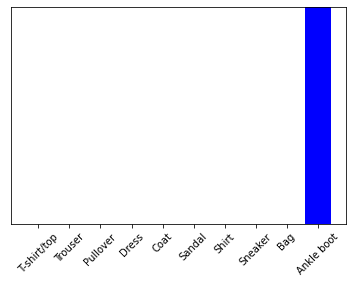

In [ ]:
plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

9

And, as before, the model predicts a label of 9.

### Confusion Matrix

Let's see how many labels where classified right and how many were misclassified


In [ ]:
# install helper utilities
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils
import importlib
importlib.reload(utils)

Cloning into 'ssp19ai_utils'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78
Unpacking objects: 100% (78/78), done.
Already up to date.


<module 'ssp19ai_utils.utils' from '/content/ssp19ai_utils/utils.py'>

In [ ]:
import seaborn as sns
#Evaluation library
from sklearn.metrics import confusion_matrix

y_predict = model.predict(X_test)


In [ ]:
print(y_predict.shape)

(10000, 10)


Confusion matrix


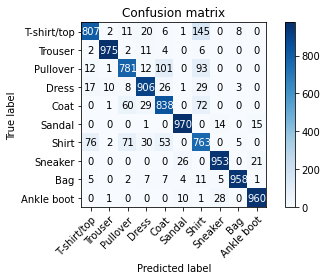

In [ ]:
# As always - let's convert the probabilities array into classes
predicted_classes = utils.label_with_highest_prob(y_predict)
# Plot the matrix
utils.plot_confusion_matrix(y_pred=predicted_classes, y_true=y_test, classes=np.array(class_names))

Let's now try hyperparameter tuning and see whether it gets improved.

In [ ]:
print(y_test.shape)

(10000,)


In [ ]:
# accuracy score

score = model.evaluate(X_test, y_test)

print("Loss: {:.4f}".format(score[0]))
print("Accuracy: {:.4f}".format(score[1]))
ann_acc = score[1]
print('ANN Score:', ann_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.8911
Loss: 0.3498
Accuracy: 0.8911
ANN Score: 0.8910999894142151


### Hyperparameter tuning in ANN

Hyperparameters are the variables which determines the network structure(Eg: Number of Hidden Units) and the variables which determine how the network is trained(Eg: Learning Rate).
Hyperparameters are set before training(before optimizing the weights and bias). 

We have a lot of parameters when it comes to :

* Number of layers
* Number of neurons in each layers
* Batch Size
* Epochs
* Optimizer
* Loss function
* Activation


In [ ]:
print(X_train.shape[1])

28


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model_fash(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Flatten(input_shape=(28, 28))) 
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 10, kernel_initializer= 'glorot_uniform', activation = 'softmax')) 
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model



In [ ]:
#Using Keras classifier to apply the function
model2 = KerasClassifier(build_fn=create_model_fash, verbose=0)

#Tuning the layers, activation function and batch sizes
layers = [(20,), (40, 20), (45, 30, 15)] # layers = [(20,), (40, 20)]   
activations = ['sigmoid', 'relu','softmax'] # activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30]) # batch_size = [128, 256]

#Using GridSearchCV to fit the param dictionary
grid = GridSearchCV(estimator=model2, param_grid=param_grid,cv=5, n_jobs=-1, verbose=2) # cv=10              !!!! In Deep Learning, It's more appropriate to use AutoML/Auto-Sklearn or NAS (Neural Architecture Search) instead of Grid Search or Random Search or Dask Search !!!!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
#Fitting the params with the training data to figure out the best params and accuracy score
grid_result = grid.fit(X_train, y_train)

print(grid_result.best_score_,grid_result.best_params_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END activation=sigmoid, batch_size=256, epochs=30, layers=(20,); total time=   8.0s
[CV] END activation=sigmoid, batch_size=256, epochs=30, layers=(20,); total time=  10.9s
[CV] END activation=relu, batch_size=256, epochs=30, layers=(20,); total time=  11.0s
[CV] END activation=relu, batch_size=256, epochs=30, layers=(20,); total time=  11.4s
0.7726166546344757 {'activation': 'sigmoid', 'batch_size': 256, 'epochs': 30, 'layers': (20,)}


In [ ]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.772617 using {'activation': 'sigmoid', 'batch_size': 256, 'epochs': 30, 'layers': (20,)}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.772617 (0.006117) with: {'activation': 'sigmoid', 'batch_size': 256, 'epochs': 30, 'layers': (20,)}
0.476417 (0.081583) with: {'activation': 'relu', 'batch_size': 256, 'epochs': 30, 'layers': (20,)}


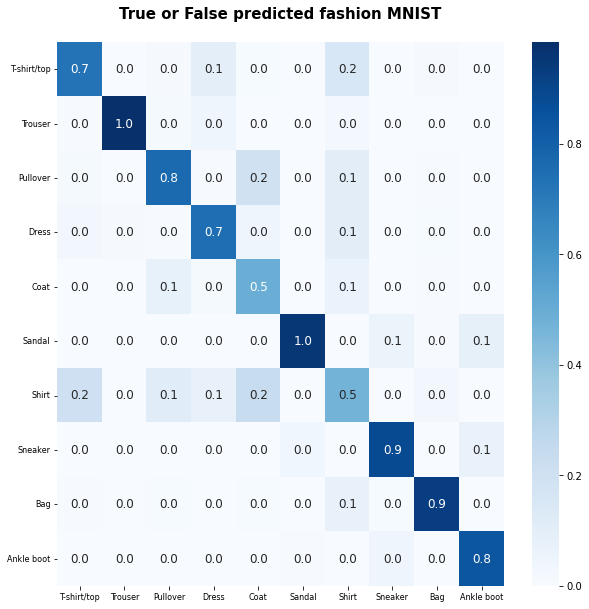

Accuracy score :  0.7753


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
#Create confusion matrix and normalizes it over predicted (columns)
pred_y = grid.predict(X_test)

con_mat=confusion_matrix(y_test, pred_y, normalize='pred')

plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
cm_array_df = pd.DataFrame(con_mat, index=class_names, columns=class_names)
g = sns.heatmap(cm_array_df,annot=True, fmt='.1f', cmap="Blues", annot_kws={"size": 12})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 8)
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#Accuracy score 
score=accuracy_score(pred_y, y_test)

print("Accuracy score : ", score)


# BONUS : Machine Learning Applications



In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of X_test:  (10000, 28, 28)
Shape of y_train:  (60000,)
Shape of y_test (10000,)


- To facilitate data entry into our traditional machine learning models, we need to perform a tensor transformation (image) from 2 dimensions (2D) to a vector of 1 dimension (1D). 
- That is, the matrix of 28×28 numbers can be represented by a vector (array) of 784 numbers (concatenating row by row), which is the format that accepts as input any traditional machine learning model. 
- In Python, converting every image of the Fashion-MNIST dataset to a vector with 784 components can be accomplished as follows:

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (60000, 784)
Shape of X_test:  (10000, 784)


# Logistic Regression

In [ ]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train) # X_train should be a 2d array, y should be a 1d array

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# model predictions

y_pred = log_reg.predict(X_test)

In [ ]:
print(y_pred.shape)

(10000,)


In [ ]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

0.86625


In [ ]:
# confusion matrix
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[807   4  17  48   5   2 108   0   9   0]
 [  2 961   1  25   5   0   4   0   2   0]
 [ 19   6 735  12 131   1  86   0  10   0]
 [ 30  12  12 869  29   0  44   0   4   0]
 [  0   2 108  38 756   1  87   0   8   0]
 [  0   0   0   1   0 925   0  51   3  20]
 [129   2 129  40 106   1 568   0  25   0]
 [  0   0   0   0   0  33   0 938   0  29]
 [  7   1   6  10   3   5  21   5 942   0]
 [  0   0   0   0   0  13   0  47   2 938]]


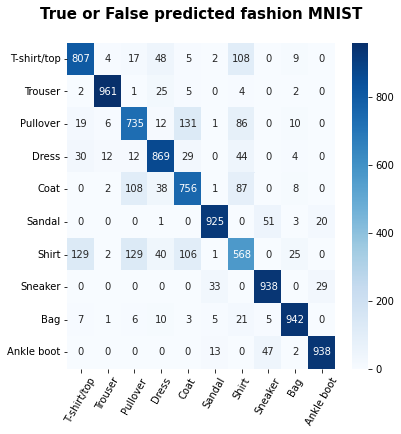

Accuracy score :  0.8439


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plotting confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
cm_array_df = pd.DataFrame(con_mat, index=class_names, columns=class_names)
g = sns.heatmap(cm_array_df,annot=True, fmt='d', cmap="Blues", annot_kws={"size": 10})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_xticklabels(g.get_xticklabels(), rotation = 60, fontsize = 10)
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#Accuracy score 
score=accuracy_score(y_pred, y_test)

print("Accuracy score : ", score)

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.73      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.76      0.74      1000
           5       0.94      0.93      0.93      1000
           6       0.62      0.57      0.59      1000
           7       0.90      0.94      0.92      1000
           8       0.94      0.94      0.94      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# K Neighbors Classifier (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# model predictions 

y_pred = knn.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.8997666666666667
0.8554


In [ ]:
# confusion matrix
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 819  11  75   0  69   0   0   0]
 [ 41   8  15 860  39   0  34   0   3   0]
 [  2   1 126  26 773   0  71   0   1   0]
 [  1   0   0   0   0 822   5  96   1  75]
 [176   1 132  23  80   0 575   0  13   0]
 [  0   0   0   0   0   3   0 961   0  36]
 [  2   0  10   4   7   0  16   7 953   1]
 [  0   0   0   0   0   2   1  29   0 968]]


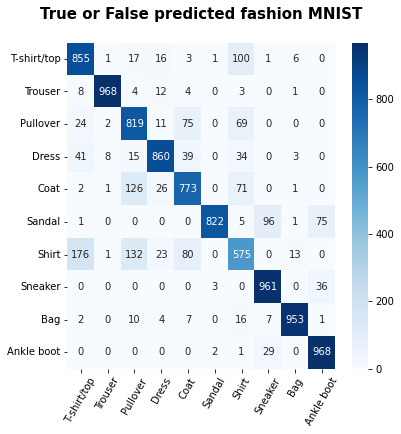

Accuracy score :  0.8554


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plotting confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
cm_array_df = pd.DataFrame(con_mat, index=class_names, columns=class_names)
g = sns.heatmap(cm_array_df,annot=True, fmt='d', cmap="Blues", annot_kws={"size": 10})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_xticklabels(g.get_xticklabels(), rotation = 60, fontsize = 10)
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#Accuracy score 
score=accuracy_score(y_pred, y_test)

print("Accuracy score : ", score)

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



# Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# svc = SVC()
# parameters = {
#    'gamma' : [0.0001, 0.001, 0.01, 0.1],
#    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
#}

#grid_search = GridSearchCV(svc, parameters)
#grid_search.fit(X_train, y_train)

In [ ]:
# best parameters

# grid_search.best_params_

In [ ]:
# best accuracy 

# grid_search.best_score_

In [ ]:
svc = SVC(C = 10, gamma = 0.01)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [ ]:
# model predictions 

y_pred = svc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.9707333333333333
0.8999


In [ ]:
# confusion matrix
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[853   0  13  21   6   1 100   0   6   0]
 [  3 972   2  18   3   0   2   0   0   0]
 [ 20   3 838   9  74   0  54   0   2   0]
 [ 27   2  13 908  27   0  18   0   5   0]
 [  0   1  84  21 834   0  59   0   1   0]
 [  0   0   0   1   0 974   0  17   1   7]
 [115   1  82  24  54   0 717   0   7   0]
 [  0   0   0   0   0  16   0 962   0  22]
 [  3   0   3   3   3   2   3   3 980   0]
 [  0   0   0   0   0   8   1  30   0 961]]


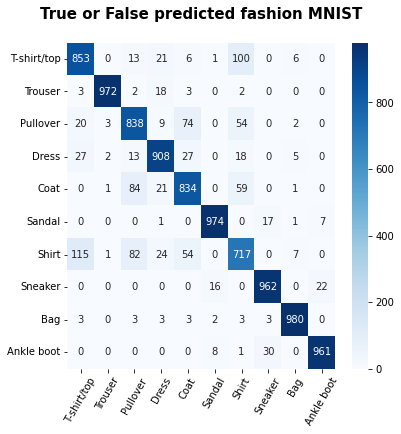

Accuracy score :  0.8999


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plotting confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
cm_array_df = pd.DataFrame(con_mat, index=class_names, columns=class_names)
g = sns.heatmap(cm_array_df,annot=True, fmt='d', cmap="Blues", annot_kws={"size": 10})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_xticklabels(g.get_xticklabels(), rotation = 60, fontsize = 10)
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#Accuracy score 
score=accuracy_score(y_pred, y_test)

print("Accuracy score : ", score)

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.84      0.82      1000
           3       0.90      0.91      0.91      1000
           4       0.83      0.83      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.75      0.72      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

#sgd = SGDClassifier()
#parameters = {
#    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
#    'loss' : ['hinge', 'log'],
#    'penalty' : ['l1', 'l2']
#}

#grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
#grid_search.fit(X_train, y_train)

In [ ]:
# best parameter 

#grid_search.best_params_

In [ ]:
sgd = SGDClassifier(alpha = 0.001, loss = 'log', penalty = 'l2')
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.001, loss='log')

In [ ]:
# model predictions 

y_pred = sgd.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, sgd.predict(X_train)))

sgd_acc = accuracy_score(y_test, sgd.predict(X_test))
print(sgd_acc)

0.8497833333333333
0.8296


In [ ]:
# confusion matrix
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[797   2  21  41   7   7 109   0  16   0]
 [  5 956   6  22   6   0   3   0   2   0]
 [ 17   5 749   6 137   0  74   0  12   0]
 [ 24  17  22 841  42   1  50   0   3   0]
 [  0   3 123  31 759   1  73   0  10   0]
 [  1   0   0   2   0 914   0  49   7  27]
 [138   2 143  30 115   3 538   0  31   0]
 [  0   0   0   0   0  51   0 892   0  57]
 [  4   1  10  13   3  13  15   5 935   1]
 [  0   0   0   0   0  44   0  40   1 915]]


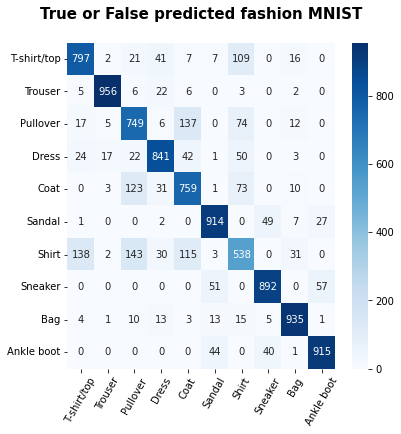

Accuracy score :  0.8296


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plotting confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
cm_array_df = pd.DataFrame(con_mat, index=class_names, columns=class_names)
g = sns.heatmap(cm_array_df,annot=True, fmt='d', cmap="Blues", annot_kws={"size": 10})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_xticklabels(g.get_xticklabels(), rotation = 60, fontsize = 10)
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#Accuracy score 
score=accuracy_score(y_pred, y_test)

print("Accuracy score : ", score)

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.70      0.75      0.72      1000
           3       0.85      0.84      0.85      1000
           4       0.71      0.76      0.73      1000
           5       0.88      0.91      0.90      1000
           6       0.62      0.54      0.58      1000
           7       0.90      0.89      0.90      1000
           8       0.92      0.94      0.93      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#dtc = DecisionTreeClassifier()

#parameters = {
#    'criterion' : ['gini', 'entropy'],
#    'max_depth' : range(2, 32, 1),
#    'min_samples_leaf' : range(1, 10, 1),
#    'min_samples_split' : range(2, 10, 1),
#    'splitter' : ['best', 'random']
#}

#grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
#grid_search_dt.fit(X_train, y_train)

In [ ]:
# best parameters

#grid_search_dt.best_params_

In [ ]:
# best score

#grid_search_dt.best_score_

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=8,
                       splitter='random')

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.9676333333333333
0.7997


In [ ]:
# confusion matrix
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[755   6  19  47   6   0 157   1   9   0]
 [  6 946   5  23  10   0   8   0   2   0]
 [ 27   1 686  16 154   0 105   0  11   0]
 [ 49  30  11 804  55   3  45   0   2   1]
 [  6   2 172  46 664   0 100   0  10   0]
 [  2   1   0   2   0 893   0  58   7  37]
 [163   7 125  37 107   2 534   1  23   1]
 [  0   0   0   0   0  44   0 891   1  64]
 [ 16   3  12   8   6  12  17   7 918   1]
 [  1   0   3   1   1  27   0  59   2 906]]


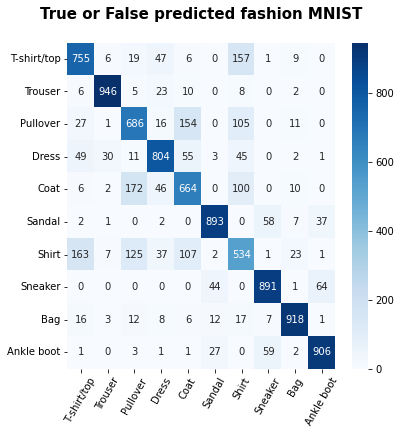

Accuracy score :  0.7997


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plotting confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
cm_array_df = pd.DataFrame(con_mat, index=class_names, columns=class_names)
g = sns.heatmap(cm_array_df,annot=True, fmt='d', cmap="Blues", annot_kws={"size": 10})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_xticklabels(g.get_xticklabels(), rotation = 60, fontsize = 10)
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#Accuracy score 
score=accuracy_score(y_pred, y_test)

print("Accuracy score : ", score)

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1000
           1       0.95      0.95      0.95      1000
           2       0.66      0.69      0.67      1000
           3       0.82      0.80      0.81      1000
           4       0.66      0.66      0.66      1000
           5       0.91      0.89      0.90      1000
           6       0.55      0.53      0.54      1000
           7       0.88      0.89      0.88      1000
           8       0.93      0.92      0.92      1000
           9       0.90      0.91      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9022333333333333
0.8524


In [ ]:
# confusion matrix
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[846   0  15  43   5   1  77   0  13   0]
 [  5 948   5  29   5   0   6   0   2   0]
 [  9   0 748  10 176   0  53   0   4   0]
 [ 23   1  12 905  35   1  21   0   2   0]
 [  1   1 100  40 801   0  55   0   2   0]
 [  0   0   0   1   0 938   0  43   2  16]
 [185   1 147  35 106   0 503   0  23   0]
 [  0   0   0   0   0   8   0 921   0  71]
 [  0   2   8   2   5   2   6   4 970   1]
 [  0   0   0   0   0   5   1  48   2 944]]


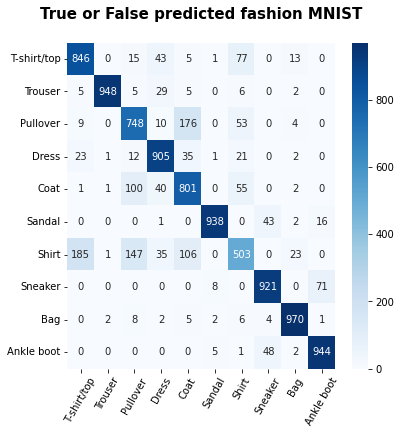

Accuracy score :  0.8524


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plotting confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
cm_array_df = pd.DataFrame(con_mat, index=class_names, columns=class_names)
g = sns.heatmap(cm_array_df,annot=True, fmt='d', cmap="Blues", annot_kws={"size": 10})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_xticklabels(g.get_xticklabels(), rotation = 60, fontsize = 10)
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#Accuracy score 
score=accuracy_score(y_pred, y_test)

print("Accuracy score : ", score)

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.72      0.75      0.74      1000
           3       0.85      0.91      0.88      1000
           4       0.71      0.80      0.75      1000
           5       0.98      0.94      0.96      1000
           6       0.70      0.50      0.58      1000
           7       0.91      0.92      0.91      1000
           8       0.95      0.97      0.96      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Logistic Regression', log_reg), ('K Nearest Neighbours', knn), ('Support Vector Classifier', svc),
               ('Decision Tree', dtc)]

vc = VotingClassifier(estimators = classifiers)

vc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('K Nearest Neighbours', KNeighborsClassifier()),
                             ('Support Vector Classifier',
                              SVC(C=10, gamma=0.01)),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=28,
                                                     min_samples_split=8,
                                                     splitter='random'))])

In [ ]:
y_pred = vc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, vc.predict(X_train)))

vc_acc = accuracy_score(y_test, y_pred)
print(vc_acc)

0.95325
0.8855


In [ ]:
# confusion matrix
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[893   0  14  14   3   1  71   0   4   0]
 [  5 971   3  17   2   0   0   0   2   0]
 [ 22   3 862   9  62   0  42   0   0   0]
 [ 38   5  12 905  23   0  16   0   1   0]
 [  1   1 123  36 803   0  34   0   2   0]
 [  1   0   0   0   0 958   0  27   1  13]
 [167   1 134  22  75   0 587   0  14   0]
 [  0   0   0   0   0  19   0 964   0  17]
 [  3   1   7   5   3   2  12   5 962   0]
 [  0   0   0   0   0   9   1  40   0 950]]


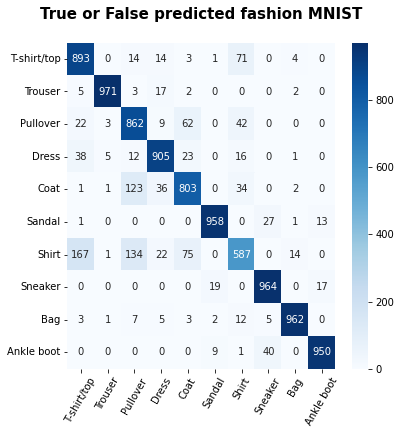

Accuracy score :  0.8855


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plotting confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
cm_array_df = pd.DataFrame(con_mat, index=class_names, columns=class_names)
g = sns.heatmap(cm_array_df,annot=True, fmt='d', cmap="Blues", annot_kws={"size": 10})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_xticklabels(g.get_xticklabels(), rotation = 60, fontsize = 10)
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#Accuracy score 
score=accuracy_score(y_pred, y_test)

print("Accuracy score : ", score)

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.86      0.80      1000
           3       0.90      0.91      0.90      1000
           4       0.83      0.80      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.77      0.59      0.67      1000
           7       0.93      0.96      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



# Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

ada = AdaBoostClassifier(dtc, n_estimators = 180)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=28,
                                                         min_samples_split=8,
                                                         splitter='random'),
                   n_estimators=180)

In [ ]:
y_pred = ada.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, ada.predict(X_train)))

ada_acc = accuracy_score(y_test, y_pred)
print(ada_acc)

1.0
0.8713


In [ ]:
# confusion matrix
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[865   0  16  33   5   1  72   0   8   0]
 [  2 962   4  25   2   0   3   0   2   0]
 [ 16   0 805   7 112   0  57   0   3   0]
 [ 21   2   7 898  24   0  45   0   3   0]
 [  1   0  90  39 803   0  65   0   2   0]
 [  0   0   0   1   0 946   0  38   1  14]
 [174   1 125  28  92   0 564   0  16   0]
 [  0   0   0   0   0   9   0 949   0  42]
 [  0   0   5   5   6   2   7   4 970   1]
 [  0   0   0   0   0   5   0  43   1 951]]


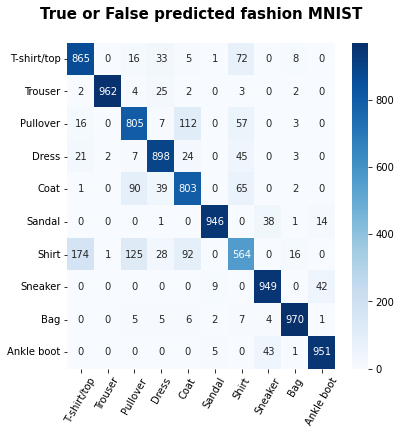

Accuracy score :  0.8713


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plotting confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
cm_array_df = pd.DataFrame(con_mat, index=class_names, columns=class_names)
g = sns.heatmap(cm_array_df,annot=True, fmt='d', cmap="Blues", annot_kws={"size": 10})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_xticklabels(g.get_xticklabels(), rotation = 60, fontsize = 10)
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#Accuracy score 
score=accuracy_score(y_pred, y_test)

print("Accuracy score : ", score)

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.77      0.81      0.78      1000
           3       0.87      0.90      0.88      1000
           4       0.77      0.80      0.79      1000
           5       0.98      0.95      0.96      1000
           6       0.69      0.56      0.62      1000
           7       0.92      0.95      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#gbc = GradientBoostingClassifier()

#parameters = {
#    'loss': ['deviance', 'exponential'],
#    'learning_rate': [0.001, 0.1, 1, 10],
#    'n_estimators': [100, 150, 180, 200]
#}

#grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
#grid_search_gbc.fit(X_train, y_train)

In [ ]:
# best parameters 

#grid_search_gbc.best_params_

In [ ]:
# best score

#grid_search_gbc.best_score_

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 1, n_estimators = 20)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=20)

In [ ]:
y_pred = gbc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

0.82355
0.7829


In [ ]:
# confusion matrix
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[719   7  22  54   4  17 143  13  11  10]
 [ 11 948   2  23   2   4   7   1   1   1]
 [ 22   2 711  19 116   5 102   8  11   4]
 [ 44  88  15 747  45   9  40   1   9   2]
 [  2   2 126  38 736   1  82   1  10   2]
 [  0   3   1  10   0 800   0  44   9 133]
 [140   7 125  49  97   5 546   2  26   3]
 [  0   2   0   0   0  59   0 840   5  94]
 [  5   2   6   7   8  23  12  28 894  15]
 [  2   0   7   1   3  39   1  54   5 888]]


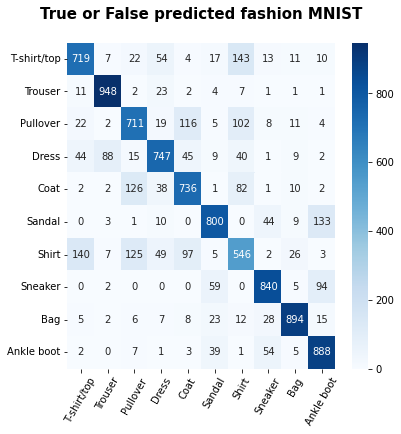

Accuracy score :  0.7829


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plotting confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
cm_array_df = pd.DataFrame(con_mat, index=class_names, columns=class_names)
g = sns.heatmap(cm_array_df,annot=True, fmt='d', cmap="Blues", annot_kws={"size": 10})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_xticklabels(g.get_xticklabels(), rotation = 60, fontsize = 10)
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#Accuracy score 
score=accuracy_score(y_pred, y_test)

print("Accuracy score : ", score)

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.89      0.95      0.92      1000
           2       0.70      0.71      0.71      1000
           3       0.79      0.75      0.77      1000
           4       0.73      0.74      0.73      1000
           5       0.83      0.80      0.82      1000
           6       0.59      0.55      0.56      1000
           7       0.85      0.84      0.84      1000
           8       0.91      0.89      0.90      1000
           9       0.77      0.89      0.83      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



# Stochastic Gradient Boosting (SGB)

In [ ]:
sgbc = GradientBoostingClassifier(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=20, random_state=0)

sgbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=20,
                           random_state=0, subsample=0.9)

In [ ]:
y_pred = sgbc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, sgbc.predict(X_train)))

sgbc_acc = accuracy_score(y_test, y_pred)
print(sgbc_acc)

0.86115
0.8403


In [ ]:
# confusion matrix
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[821   0   8  52   8   1  97   0  13   0]
 [ 13 927   5  40   6   1   5   0   3   0]
 [ 11   1 734  10 154   0  82   0   8   0]
 [ 32   4   8 875  30   2  46   0   3   0]
 [  2   1 112  48 758   0  73   0   6   0]
 [  1   1   1   0   0 912   0  51   3  31]
 [153   1 117  45  94   0 567   0  23   0]
 [  0   0   0   0   0  11   0 926   0  63]
 [  0   0   5  13   7   2  19   9 942   3]
 [  0   0   0   1   0   7   0  49   2 941]]


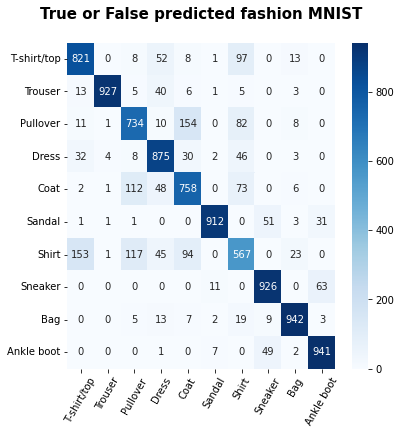

Accuracy score :  0.8403


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plotting confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
cm_array_df = pd.DataFrame(con_mat, index=class_names, columns=class_names)
g = sns.heatmap(cm_array_df,annot=True, fmt='d', cmap="Blues", annot_kws={"size": 10})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_xticklabels(g.get_xticklabels(), rotation = 60, fontsize = 10)
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#Accuracy score 
score=accuracy_score(y_pred, y_test)

print("Accuracy score : ", score)

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1000
           1       0.99      0.93      0.96      1000
           2       0.74      0.73      0.74      1000
           3       0.81      0.88      0.84      1000
           4       0.72      0.76      0.74      1000
           5       0.97      0.91      0.94      1000
           6       0.64      0.57      0.60      1000
           7       0.89      0.93      0.91      1000
           8       0.94      0.94      0.94      1000
           9       0.91      0.94      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# Extreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 20)

xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=20,
              objective='multi:softprob')

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

0.9316166666666666
0.8744


In [ ]:
# confusion matrix
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[832   0  12  35   8   1 105   0   7   0]
 [  3 969   3  17   3   0   4   0   1   0]
 [ 13   1 788   9  99   0  87   0   3   0]
 [ 22   4   9 897  32   0  35   0   1   0]
 [  0   0 106  30 799   0  63   0   2   0]
 [  0   0   1   1   0 961   0  23   1  13]
 [138   2 109  34  89   0 614   0  14   0]
 [  0   0   0   0   0   7   0 965   0  28]
 [  2   1   6   2   4   2   9   4 970   0]
 [  0   0   0   0   0   8   1  41   1 949]]


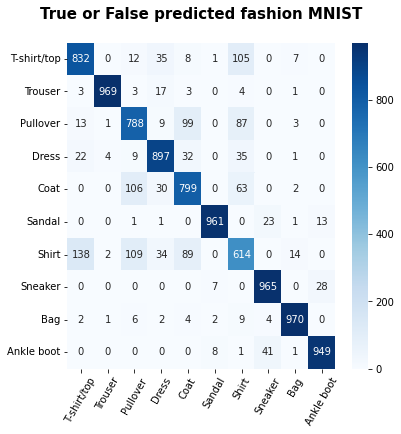

Accuracy score :  0.8744


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plotting confusion matrix
plt.style.use('seaborn-deep')
plt.figure(figsize=(6,6))
cm_array_df = pd.DataFrame(con_mat, index=class_names, columns=class_names)
g = sns.heatmap(cm_array_df,annot=True, fmt='d', cmap="Blues", annot_kws={"size": 10})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_xticklabels(g.get_xticklabels(), rotation = 60, fontsize = 10)
plt.title('True or False predicted fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#Accuracy score 
score=accuracy_score(y_pred, y_test)

print("Accuracy score : ", score)

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.79      0.77      1000
           3       0.88      0.90      0.89      1000
           4       0.77      0.80      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.67      0.61      0.64      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Measure the performance of all the models

In [ ]:

accuracy_all_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'SGD Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Voting Classifier', 'Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Artificial Neural Networks'],
    'Score': [log_reg_acc, knn_acc, svc_acc, sgd_acc, dtc_acc, ran_clf_acc, vc_acc, ada_acc, gbc_acc, sgbc_acc, xgb_acc, ann_acc]
})

accuracy_all_models.sort_values(by = 'Score', ascending = False)


# Visualizing Model Performance

In [ ]:
import seaborn as sns
# accuracy_all_models.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='Score', data=accuracy_all_models, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('Acurracy Score', size=16)

plt.show()